# Part II - Ford GoBike System Dataset
## by Carla Mota Leal

## Investigation Overview

**Objective:**  In this investigation, I wanted to look at the variables presented in the dataset of the Ford GoBike system and evaluate what could be assumed for users behavior, gender distribution, age demographics, and usage patterns, which can be valuable for strategic planning, marketing campaigns, and service improvements.

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, California. The dataset started with 183412 rows and 16 columns, with the variables:
- *duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip.*

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df_cleaned = pd.read_csv("2019-02-fordgobike-clean.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Users behavior

After wrangling the original dataset, the dataframe went from 183412 to 174880 rows.
While visualizing the type of customers distribution in the bike service: 
    
- The majority of bike service customers are **subscribed members**, highlighting the importance of subscriber loyalty and the benefits of subscription-based models.
- Subscribers account for a significant portion of users during high-volume hours, busy weekdays, and throughout the week. 



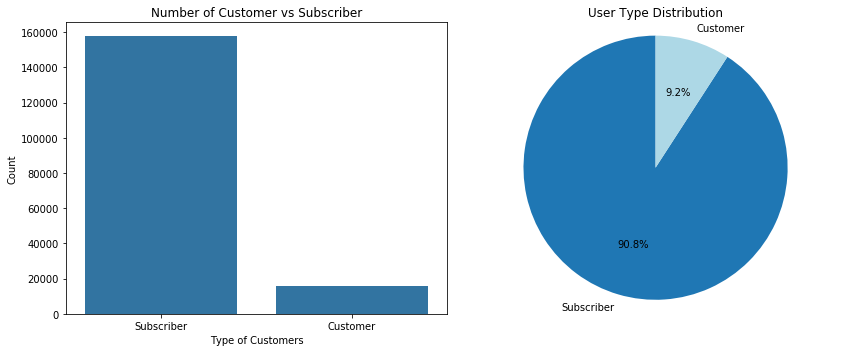

In [8]:
plt.figure(figsize=(12, 5))
df_duration = df_cleaned.query("duration_min <= 60")

# Define colors
base_color = sb.color_palette()[0]
lightblue_color = 'lightblue'

# First subplot - bar plot
plt.subplot(1, 2, 1)
sb.countplot(data=df_duration, x='user_type', color=base_color)
plt.title('Number of Customer vs Subscriber')
plt.xlabel('Type of Customers')
plt.ylabel('Count')

# Second subplot - pie chart
plt.subplot(1, 2, 2)
# Calculate the count of each user type
user_type_counts = df_duration['user_type'].value_counts()

# Plotting the pie chart
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%', startangle=90, colors=[base_color, lightblue_color])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('User Type Distribution')

plt.tight_layout()  # Adjust spacing between subplots

plt.show()

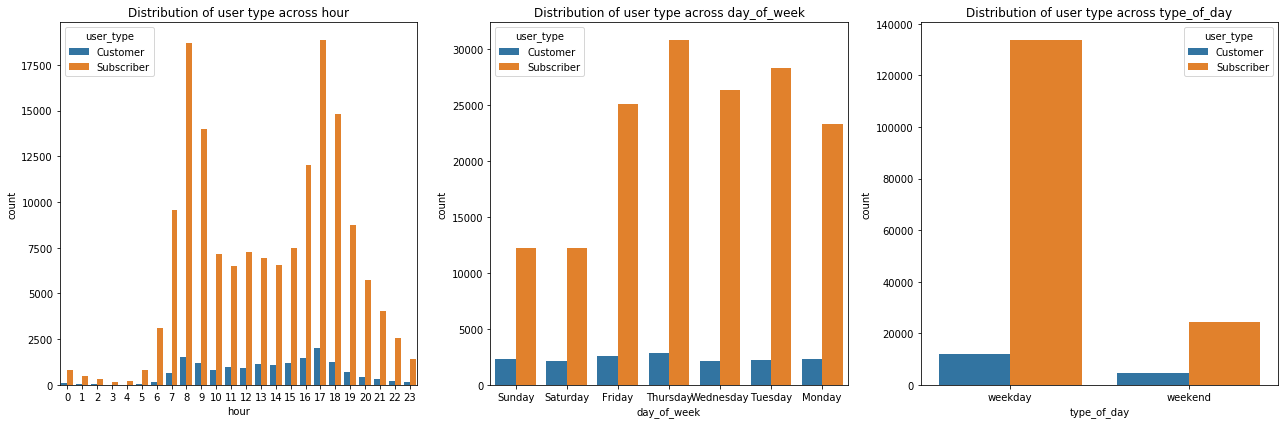

In [5]:
import calendar #calendar module to get the names of the weekdays in the desired order.

variables = ['hour', 'day_of_week', 'type_of_day']

plt.figure(figsize=[18, 6])

for i, variable in enumerate(variables, 1):
    plt.subplot(1, len(variables), i)
    if variable == 'day_of_week':
        days_order = [calendar.day_name[i] for i in range(6, -1, -1)]  # Sunday to Saturday order
        sb.countplot(data=df_cleaned, x=variable, hue='user_type', order=days_order)
    else:
        sb.countplot(data=df_cleaned, x=variable, hue='user_type')
    plt.title(f'Distribution of user type across {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

## Usage patterns
After creating new columns for weekday or weekend, duration in minutes,and hour & day, here the considerations of the investigation of the usage patterns:

- Weekdays, especially Thursday, Tuesday, and Wednesday, witness a higher frequency of bike trips.

- The majority of bike trips have a duration ranging from 3 to 20 minutes. 

- The station located at Market St at 10th St. serves as the most popular starting point for bike trips. 

- Peak usage hours for the bike service align with typical morning and evening commuting times, specifically around 8 AM and 5 PM. 


**In summary, the analysis of usage patterns indicates that the bike service is primarily utilized for weekday commuting, short-distance travel, and during peak commuting hours. The subscription model plays a significant role in driving usage, particularly during high-demand periods.**

Text(0.5,1,'Number of trips per type of day')

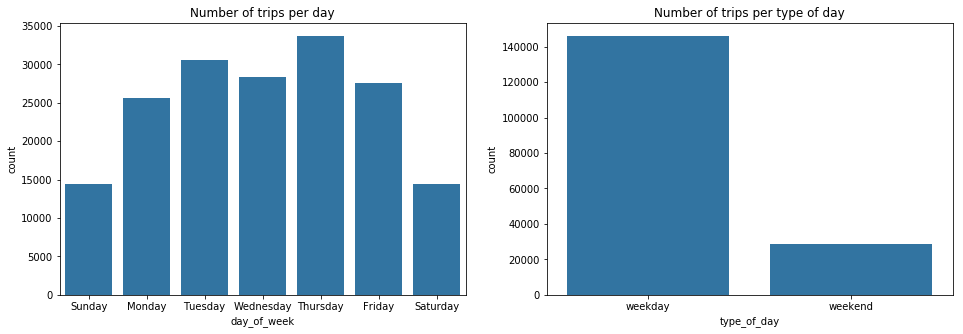

In [9]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]     # making plot of one color 
days = ('Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday', 'Saturday')
    
    
plt.subplot(1, 2, 1)
sb.countplot(data= df_cleaned , x='day_of_week' , color=base_color , order = days)
plt.title('Number of trips per day')


plt.subplot(1, 2, 2)
sb.countplot(data= df_cleaned , x='type_of_day' , color=base_color)
plt.title('Number of trips per type of day')

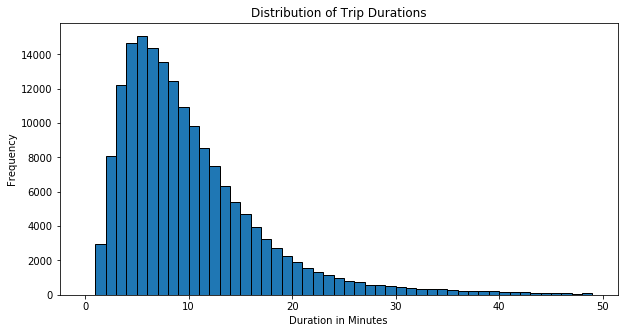

In [10]:
plt.figure(figsize=[10, 5])
bins_x = np.arange(0, 50, 1)

plt.hist(data=df_cleaned, x='duration_min', bins=bins_x, edgecolor='black')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')

plt.show()

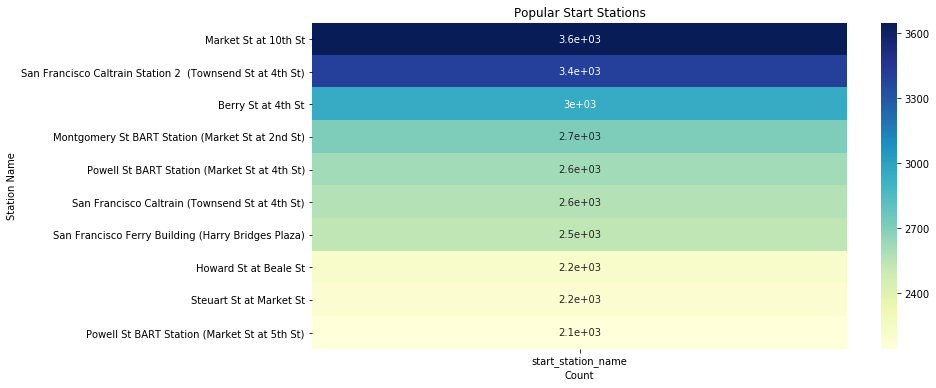

In [15]:
# Aggregating data for popular start stations
popular_stations = df_cleaned['start_station_name'].value_counts().nlargest(10)

# Creating a heatmap for popular start stations
plt.figure(figsize=(12, 6))
sb.heatmap(popular_stations.to_frame(), annot=True, cmap='YlGnBu')
plt.title('Popular Start Stations')
plt.xlabel('Count')
plt.ylabel('Station Name')
plt.show()

plt.show()

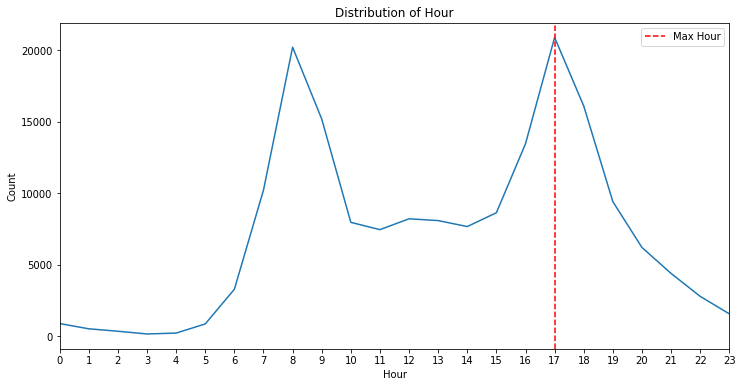

In [12]:
plt.figure(figsize=[12, 6])
base_color = sb.color_palette()[0]

hour_counts = df_cleaned['hour'].value_counts().sort_index()

plt.plot(hour_counts.index, hour_counts.values, color=base_color)
plt.title('Distribution of Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xlim((0, 23))  # set the x-axis limits from 0 to 23 (inclusive)

plt.xticks(np.arange(0, 24, 1))  # explicitly set the tick locations and labels for all hours

# Find the maximum count and its corresponding hour
max_hour = hour_counts.idxmax()
max_count = hour_counts.max()

plt.axvline(x=max_hour, color='red', linestyle='--', label='Max Hour')

plt.legend()  # display legend

plt.show()

## Age demographic and gender distribution

- The highest number of users, in terms of both age and gender, falls within the 26-35-year-old male category.
- Males show a higher number of trips during weekdays and days of the week.
- The average age distribution shows similarities among genders, with males generally being older than females and other gender categories.

**These findings highlight the importance of considering demographic factors such as age and gender when analyzing and understanding the usage patterns of the bike service.**

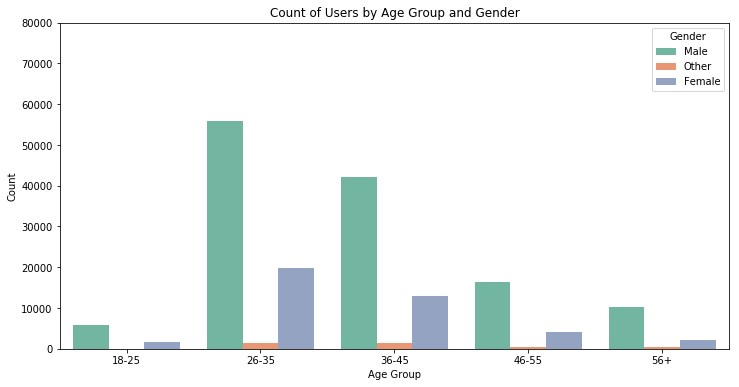

In [16]:
plt.figure(figsize=[12, 6])

# Grouping age into bins
age_bins = [18, 25, 35, 45, 55, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56+']
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=age_bins, labels=age_labels)

sb.countplot(data=df_cleaned, x='age_group', hue='member_gender', palette='Set2')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Users by Age Group and Gender')
plt.legend(title='Gender')

# Adjusting the visibility of the bars
plt.ylim([0, 80000])

plt.show()

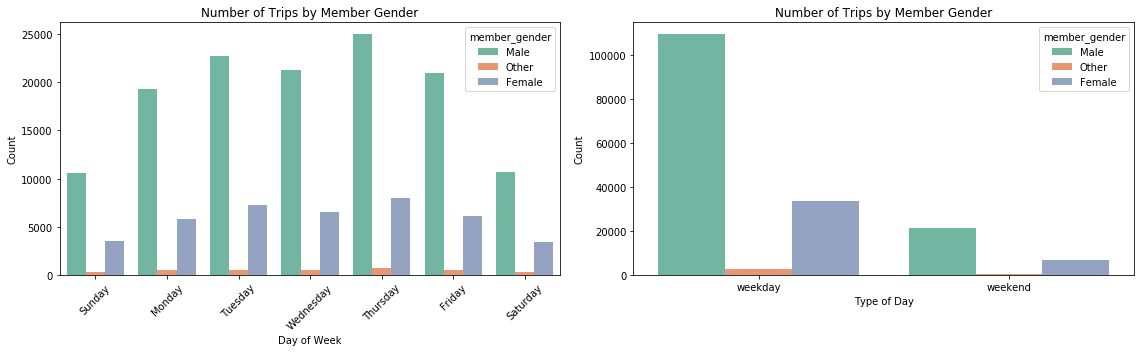

In [6]:
plt.figure(figsize=[16, 5])

plt.subplot(1, 2, 1)
days = ('Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday', 'Saturday')
sb.countplot(data=df_cleaned, x='day_of_week', hue='member_gender', palette='Set2', order = days)
plt.title('Number of Trips by Member Gender')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sb.countplot(data=df_cleaned, x='type_of_day', hue='member_gender', palette='Set2')
plt.title('Number of Trips by Member Gender')
plt.xlabel('Type of Day')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Conclusion

The findings suggest that the service is primarily utilized for **commuting purposes**, with a significant **gender disparity** in usage. 
The age range of users tends to be concentrated in the **30-40-year-old** bracket, and **subscribers** account for the majority of users during peak hours and weekdays. 


*These observations can help inform marketing strategies, service improvements, and target audience considerations for the bike service.*

In [ ]:
# slide formatting
!jupyter nbconvert Part_II_slide_deck_CML.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_CML.ipynb to slides
[NbConvertApp] Writing 518846 bytes to Part_II_slide_deck_CML.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_CML.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-b